##  Import libraries

# Task-2

In [1]:
import numpy as np
import pandas as pd
import re

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import warnings
warnings.filterwarnings('ignore')

##  Import data

In [2]:
data = pd.read_csv("tested.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
print(f'''The shape of data: {data.shape}''')

The shape of data: (418, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
round(data['Survived'].mean()*100,2)

36.36

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# columns which have nulls and the percentage of nulls in each column

data_na = (data.isnull().sum() / len(data)) *100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Percentage of nulls' :data_na , 'Number of nulls' : data[data_na.index].isna().sum()})
missing_data

,Percentage of nulls,Number of nulls
Cabin,78.229665,327
Age,20.574163,86
Fare,0.239234,1


In [12]:
data[['Ticket']].duplicated().sum()/len(data)*100

13.157894736842104

In [13]:
#Drop PassengerId column 
data.drop(columns='PassengerId', inplace=True)

#Drop Cabin column.
data.drop(columns='Cabin', inplace=True)

#Drop Ticket column
data.drop(columns='Ticket', inplace=True)

In [14]:
#Imputing null values of Age column
    
mean = data["Age"].mean()
std = data["Age"].std()
nulls = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
random_age = np.random.randint(mean - std, mean + std, size = nulls)
    
# fill NaN values in Age column with random values generated
data["Age"][data["Age"].isna()] = random_age
data["Age"] = data["Age"].astype(int)
    
#Imputing null values of Embarked column
    
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)    
    

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [16]:
title_list = data['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1]).unique()
title_list

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [17]:
# replacing all titles with mr, mrs, miss, master, and boy 
def replace_titles(x):
    title=x['Title'].strip()
    
    if (x['Age']<13): return 'Boy'
    
    if title in ['Don', 'Rev', 'Col','Capt','Sir','Major','Jonkheer']: return 'Mr'
    
    elif title in ['Countess', 'Mme']: return 'Mrs'
    
    elif title in ['Mlle', 'Ms','Lady','Dona']: return 'Miss'
    
    elif title =='Dr':
        
        if x['Sex']=='male': return 'Mr'
        else: return 'Mrs'
        
    else: return title

#create a new columns containing the title for each name
data['Title'] = data['Name'].apply(lambda x: re.findall(r'[, ]\w+[.]',x)[0][:-1])
    
#apply replacing title function to all titles
data['Title'] = data.apply(replace_titles, axis=1)

In [18]:
print(f'Data has : {data["Title"].unique()}')
print()
print(data["Title"].value_counts())

Data has : ['Mr' 'Mrs' 'Miss' 'Boy' 'Master']

Mr        245
Mrs        72
Miss       68
Boy        25
Master      8
Name: Title, dtype: int64


In [19]:
#drop Name column
data.drop(columns='Name', inplace=True)

In [20]:
#create FamilyCount column.
data['FamilyCount'] = data['SibSp'] + data['Parch']+1

In [21]:
data['FamilyCount'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: FamilyCount, dtype: int64

In [22]:
#create IsAlone column.
data.loc[data['FamilyCount'] > 1, 'IsAlone'] = 0
data.loc[data['FamilyCount'] == 1, 'IsAlone'] = 1   
data['IsAlone'] = data['IsAlone'].astype(int)

In [23]:
data['IsAlone'].value_counts()

1    253
0    165
Name: IsAlone, dtype: int64

In [24]:
data.groupby(['IsAlone', 'Survived'])['Survived'].count()

IsAlone  Survived
0        0            81
         1            84
1        0           185
         1            68
Name: Survived, dtype: int64

In [25]:
#drop SibSp and Parch column
data.drop(columns='SibSp', inplace=True)
data.drop(columns='Parch', inplace=True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,IsAlone
0,0,3,male,34,7.8292,Q,Mr,1,1
1,1,3,female,47,7.0000,S,Mrs,2,0
2,0,2,male,62,9.6875,Q,Mr,1,1
3,0,3,male,27,8.6625,S,Mr,1,1
4,1,3,female,22,12.2875,S,Mrs,3,0


# 4 | Exploratory Data Analysis(EDA)

In [27]:
# Add labels to the end of each bar in a bar chart.

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label    
    for rect in ax.patches:
        
        # Get X and Y placement of label from rect.
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()-3

        # Determine vertical alignment for positive and negative values
        va = 'bottom' if y >= 0 else 'top'

        # Format the label to one decimal place
        label = "{}".format(y)

        # Determine the vertical shift of the label
        # based on the sign of the y value and the spacing parameter
        y_shift = spacing * (1 if y >= 0 else -1)

        # Create the annotation
        ax.annotate(label, (x, y), xytext=(0, y_shift),textcoords="offset points", ha='center', va=va)

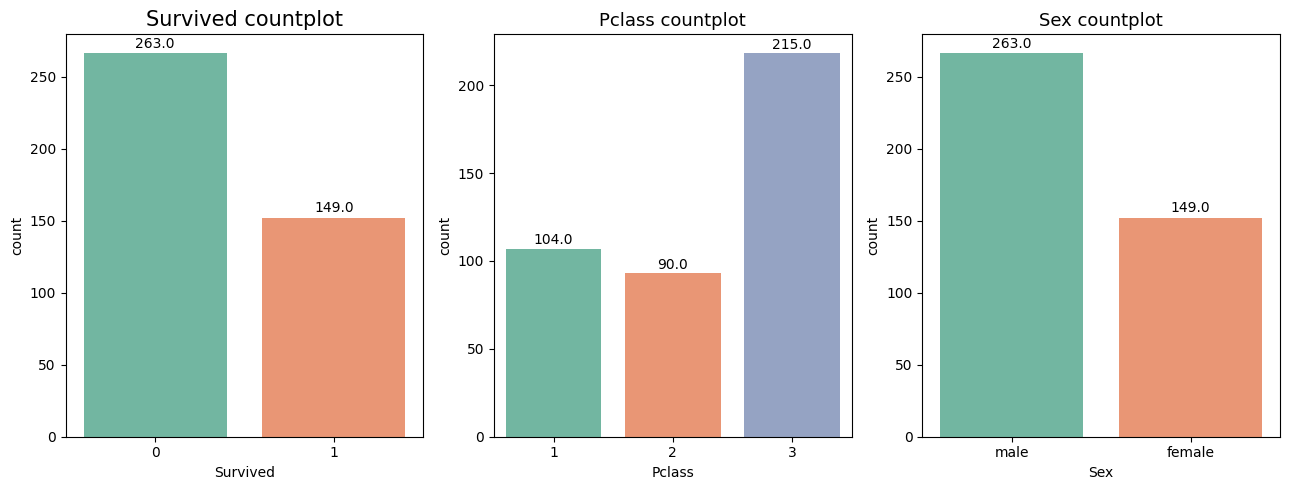

In [28]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Survived countplot', size=15)
plot= sns.countplot(data=data, x='Survived' ,palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Pclass countplot', size=13)
plot= sns.countplot(data=data, x='Pclass', palette="Set2")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Sex countplot', size=13)
plot= sns.countplot(data=data, x='Sex', palette='Set2')
add_value_labels(plot)

plt.tight_layout()

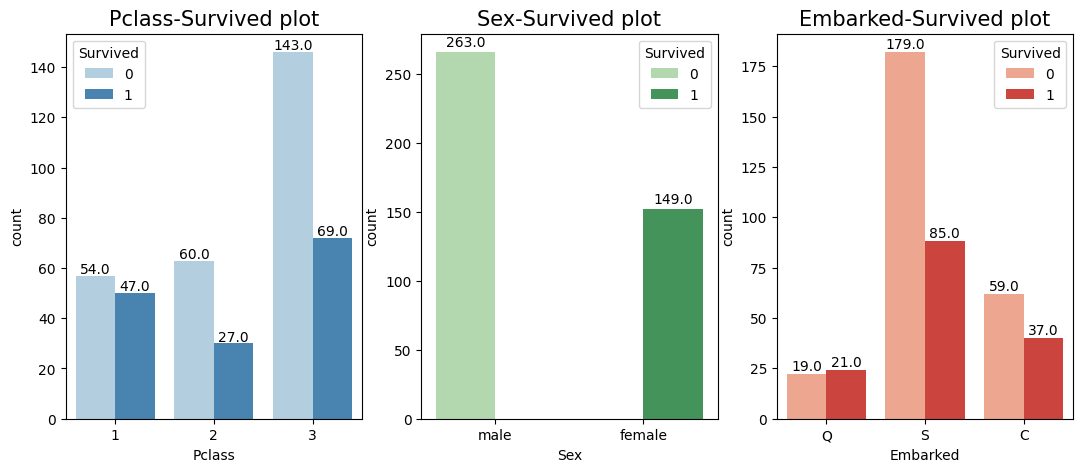

In [29]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
plt.title('Pclass-Survived plot', size=15)
plot= sns.countplot(data=data, x='Pclass',hue='Survived' ,palette="Blues")
add_value_labels(plot)

plt.subplot(1,3,2)
plt.title('Sex-Survived plot', size=15)
plot= sns.countplot(data=data, x='Sex', hue='Survived' ,palette="Greens")
add_value_labels(plot)

plt.subplot(1,3,3)
plt.title('Embarked-Survived plot', size=15)
plot= sns.countplot(data=data, x='Embarked',hue='Survived' ,palette="Reds")
add_value_labels(plot)

In [30]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


In [31]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,1.0
1,male,0.0


In [32]:
#survived passengers
survived_passengers= data[data['Survived']==1]

#non-survived passengers
unsurvived_passengers= data[data['Survived']==0]

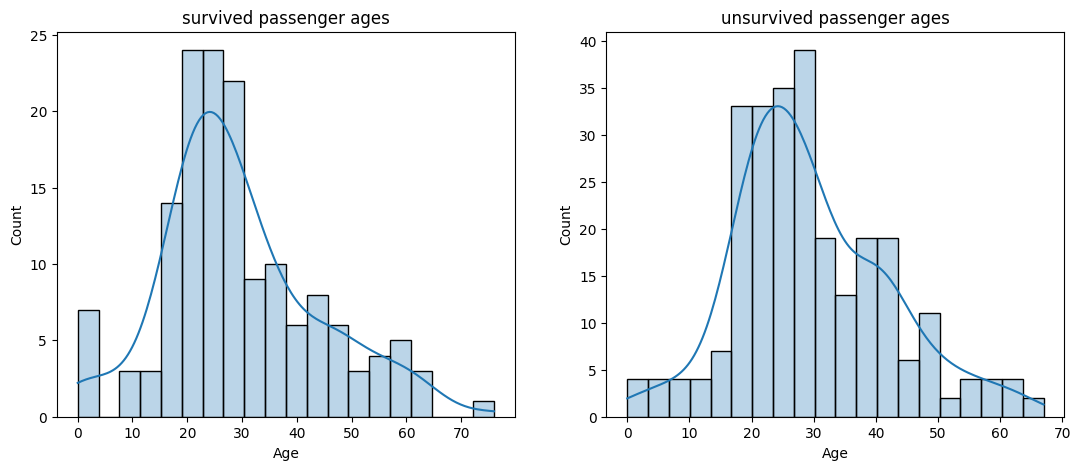

In [33]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', kde=True, bins=20,  alpha=0.3 );

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age', kde=True, bins=20, alpha=0.3 );

In [34]:
Infant_passengers = data[data['Age']<=5]
Infant_passengers['Survived'].value_counts(normalize=True)

1    0.583333
0    0.416667
Name: Survived, dtype: float64

In [35]:
Old_passengers = data[data['Age']==80]
Old_passengers['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

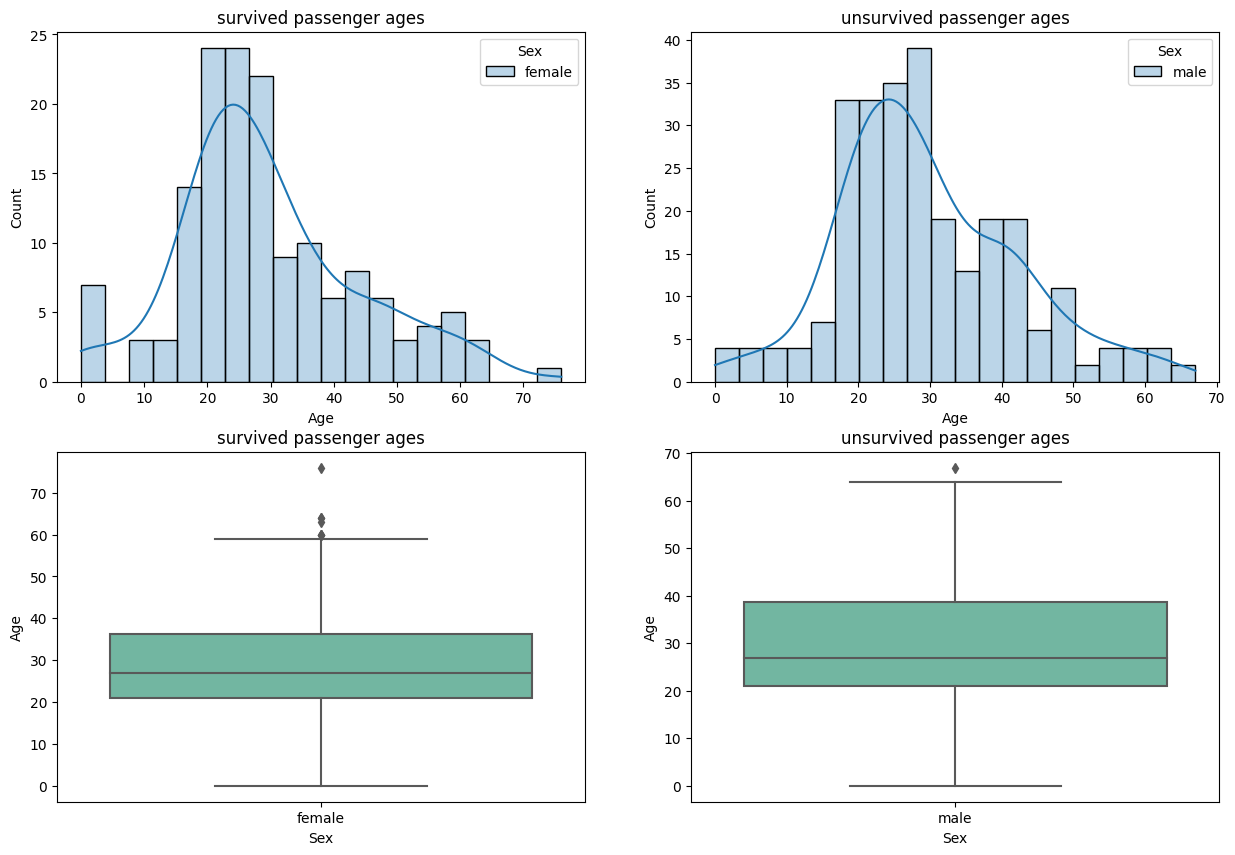

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('survived passenger ages')
sns.histplot(data=survived_passengers, x='Age', hue='Sex', kde=True, bins=20,  alpha=0.3 );

plt.subplot(2,2,2)
plt.title('unsurvived passenger ages')
sns.histplot(data=unsurvived_passengers, x='Age',hue='Sex', kde=True, bins=20, alpha=0.3 );

plt.subplot(2,2,3)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Sex'], y=data["Age"],palette="Set2");

plt.subplot(2,2,4)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Sex'], y=data["Age"],palette="Set2");

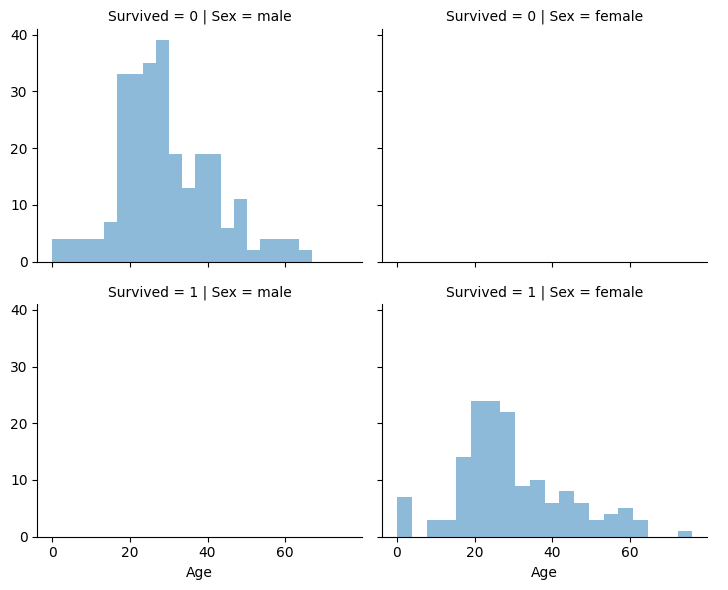

In [37]:
grid = sns.FacetGrid(data, col='Sex', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [38]:
print('surviving male passengers \n')

print(survived_passengers[survived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('surviving female passengers \n')

print(survived_passengers[survived_passengers['Sex']=='female'][['Age']].describe().T)

surviving male passengers 

     count  mean  std  min  25%  50%  75%  max
Age    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
--------------------------------
surviving female passengers 

     count       mean        std  min   25%   50%    75%   max
Age  152.0  29.559211  14.365952  0.0  21.0  27.0  36.25  76.0


In [39]:
print('non-surviving male passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='male'][['Age']].describe().T)
print('--------------------------------')
print('non-surviving female passengers \n')

print(unsurvived_passengers[unsurvived_passengers['Sex']=='female'][['Age']].describe().T)

non-surviving male passengers 

     count       mean        std  min   25%   50%    75%   max
Age  266.0  29.620301  12.491605  0.0  21.0  27.0  38.75  67.0
--------------------------------
non-surviving female passengers 

     count  mean  std  min  25%  50%  75%  max
Age    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


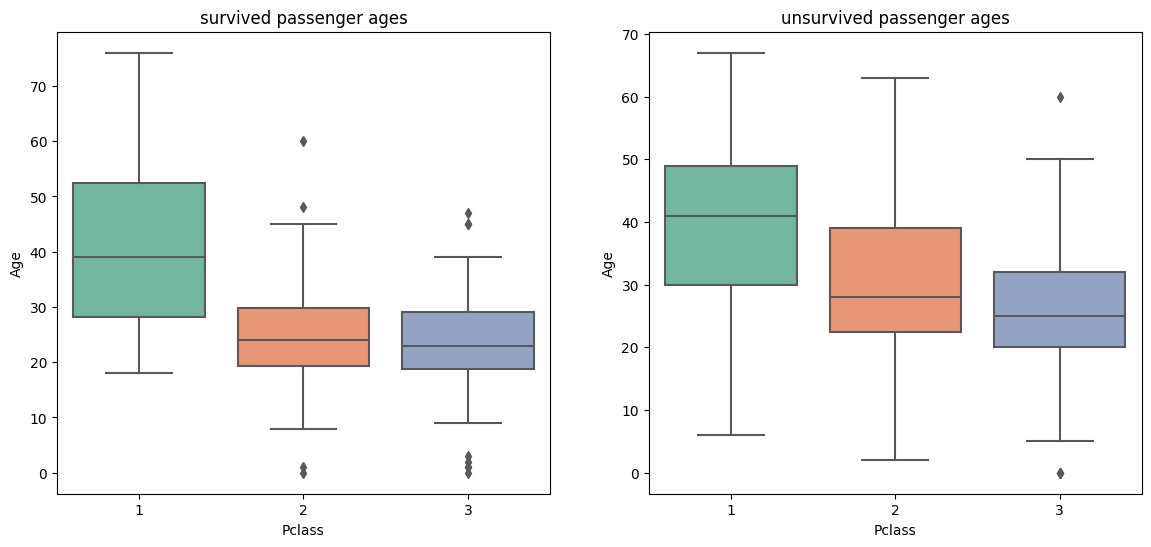

In [40]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
sns.boxplot(x=survived_passengers['Pclass'], y=data["Age"],palette="Set2");

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
sns.boxplot(x=unsurvived_passengers['Pclass'], y=data["Age"],palette="Set2");

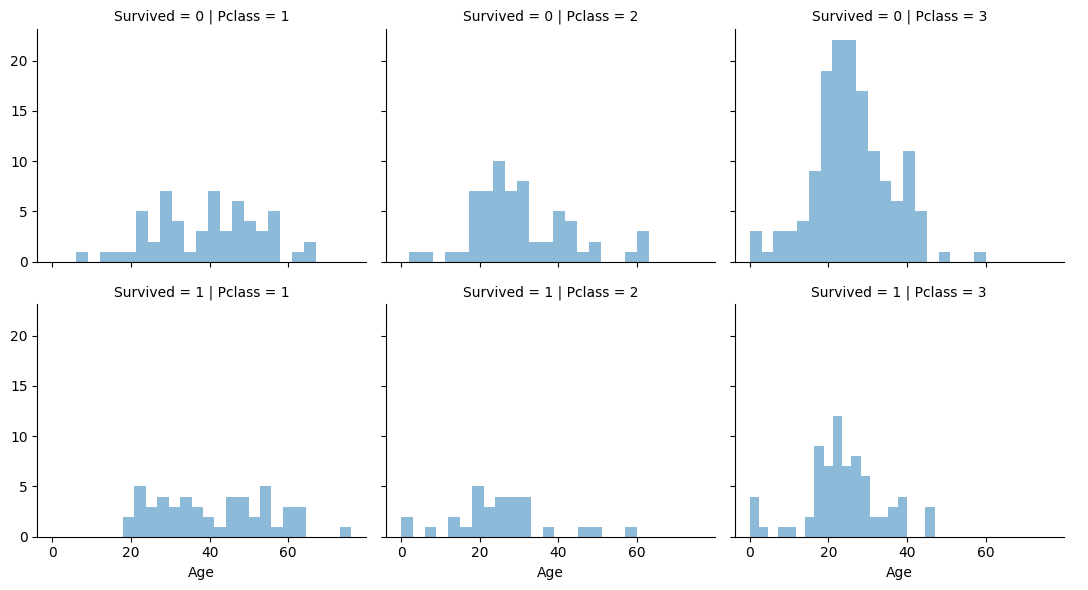

In [41]:
grid = sns.FacetGrid(data, col='Pclass', row='Survived', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

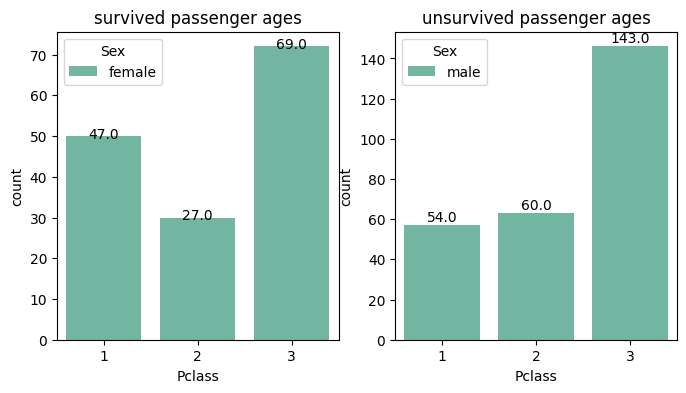

In [50]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Pclass', hue='Sex',palette="Set2");
add_value_labels(plot)

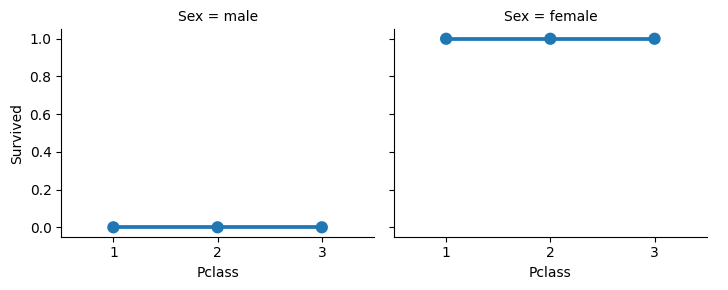

In [51]:
grid = sns.FacetGrid(data, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'Pclass', 'Survived')
grid.add_legend();

In [52]:
#survived passengers
survived_passengers= data[data['Survived']==1]

#non-survived passengers
unsurvived_passengers= data[data['Survived']==0]

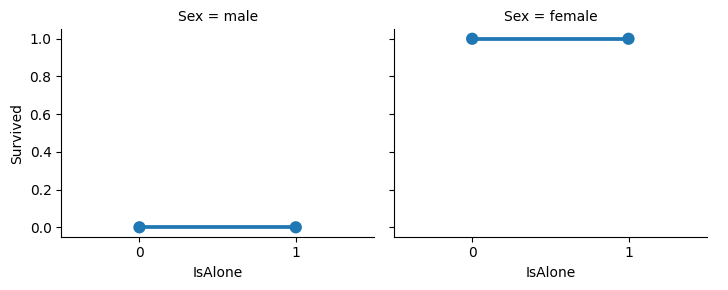

In [53]:
grid = sns.FacetGrid(data, col='Sex', aspect=1.2)
grid.map(sns.pointplot,'IsAlone', 'Survived')
grid.add_legend();

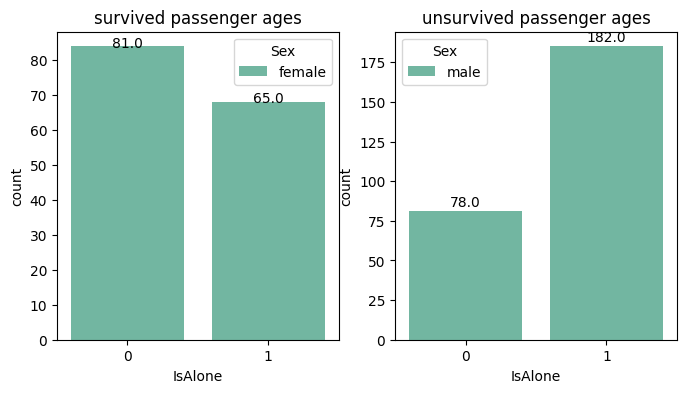

In [54]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='IsAlone', hue='Sex',palette="Set2");
add_value_labels(plot)

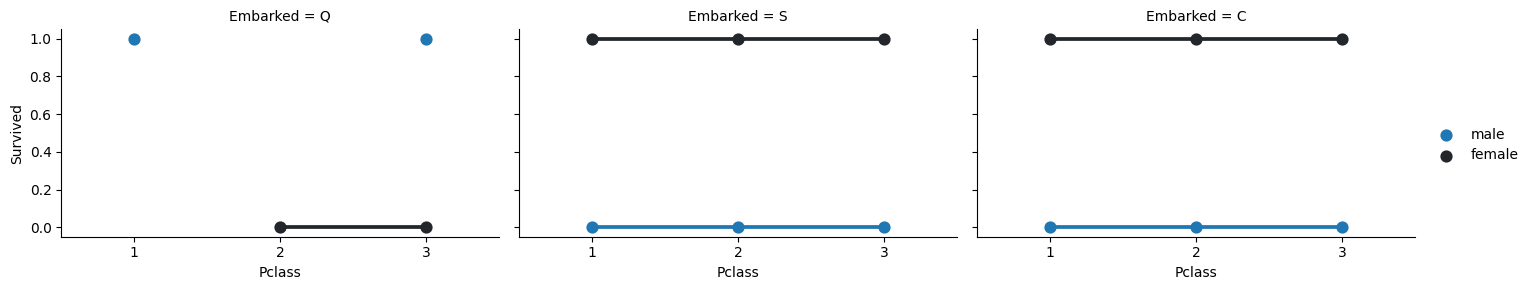

In [55]:
grid = sns.FacetGrid(data, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

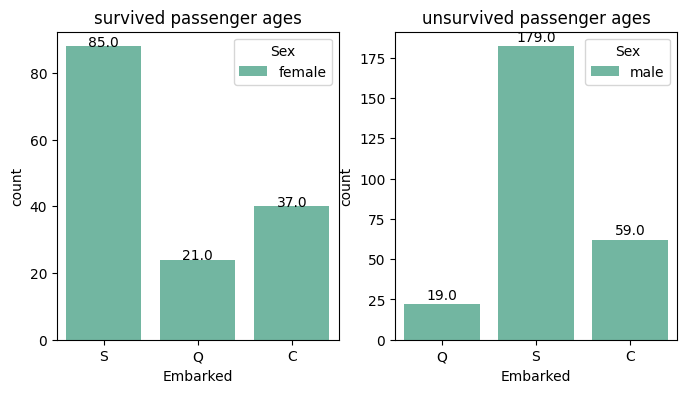

In [56]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('survived passenger ages')
plot=sns.countplot(data=survived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

plt.subplot(1,2,2)
plt.title('unsurvived passenger ages')
plot=sns.countplot(data=unsurvived_passengers, x='Embarked', hue='Sex',palette="Set2");
add_value_labels(plot)

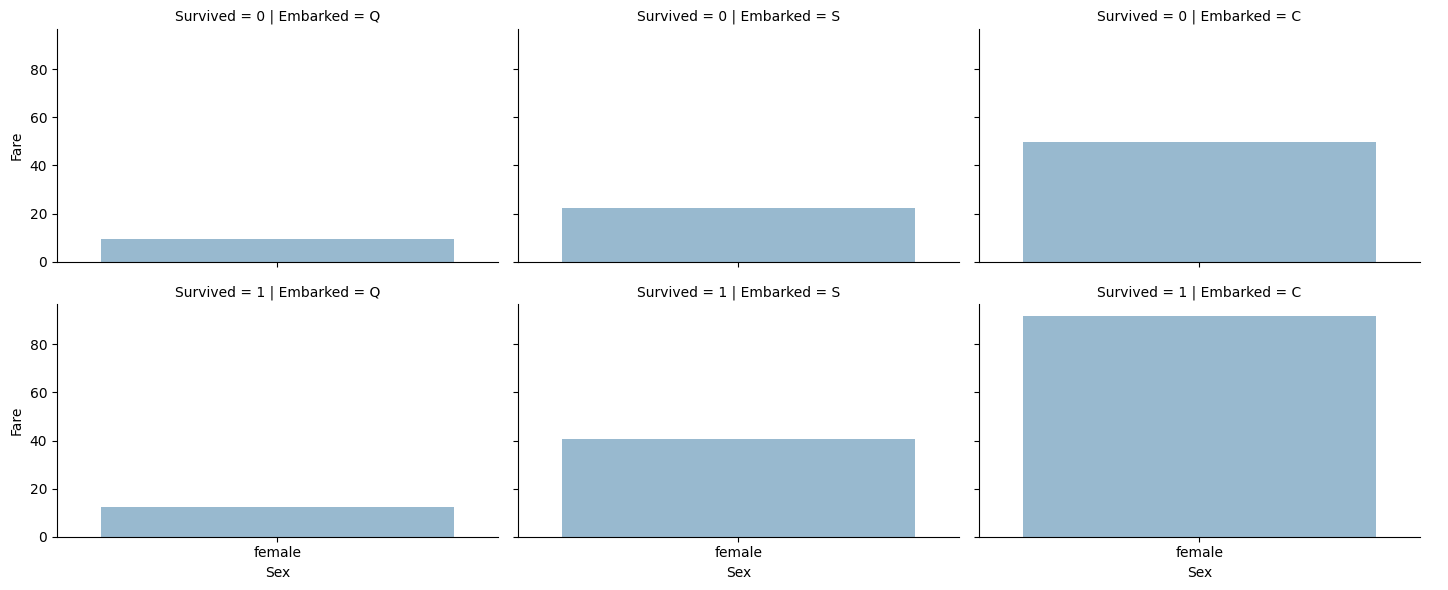

In [57]:
grid = sns.FacetGrid(data, col='Embarked', row='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();